In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
df=pd.read_csv("C:/Users/Karim/Desktop/Machine_Laerning_project/online_payment_fraud/PS_20174392719_1491204439457_log.csv")
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [3]:
df.info()
# df['type'].value_counts()
# df.isna().sum()
# df['step'].describe()
# df['balance_dest_diff'].describe()
# df['isFlaggedFraud'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


### What is the most type of transaction caused fraud?

<AxesSubplot:xlabel='type', ylabel='isFraud'>

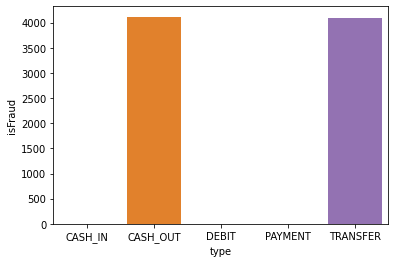

In [7]:
import seaborn as sns
t=pd.DataFrame(df.groupby(by=df['type'])['isFraud'].sum())
sns.barplot(data=t,x=t.index, y='isFraud')

### Top 20 step number that fraud occured

Text(0, 0.5, 'Fraud count by step')

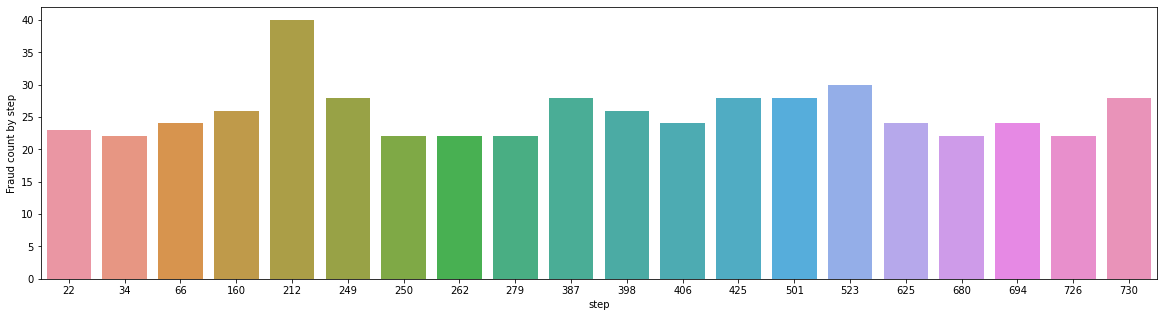

In [9]:
import matplotlib.pyplot as plt 
t=pd.DataFrame(df.groupby(by=df['step'])['isFraud'].sum())
t2=t.sort_values(by='isFraud', ascending=False).head(20)
t2 = t2.rename_axis('step').reset_index()
plt.figure(figsize=(20,5))
sns.barplot(data=t2,x='step', y='isFraud',)
plt.ylabel('Fraud count by step')

### Top 10 richest customer who had biggest loss from fraud

In [10]:
t=df.loc[df['isFraud']==1,['nameOrig','oldbalanceOrg','newbalanceOrig']]

In [11]:
t['loss_from_fraud']=t['oldbalanceOrg']-t['newbalanceOrig']
t3=t.sort_values(by=['loss_from_fraud','oldbalanceOrg'],ascending=False)
t3.head(10)

,nameOrig,oldbalanceOrg,newbalanceOrig,loss_from_fraud
6266405,C794290057,42542664.27,32542664.27,10000000.0
6357390,C671111468,37418265.31,27418265.31,10000000.0
5563707,C1421664654,34892193.09,24892193.09,10000000.0
6010857,C1295280435,23752520.60,13752520.60,10000000.0
6168495,C292642955,23576297.10,13576297.10,10000000.0
6074073,C315155195,22625132.51,12625132.51,10000000.0
6014709,C524119157,19228514.10,9228514.10,10000000.0
5563723,C1074619527,19110884.44,9110884.44,10000000.0
5996399,C40489106,59585040.37,49585040.37,10000000.0
6362452,C726730575,57316255.05,47316255.05,10000000.0


In [12]:
# t3.info()
t3['loss_from_fraud'].value_counts()

10000000.00    262
0.00            57
10000000.00     12
10000000.00      5
1165187.89       4
              ... 
79466.45         1
75956.47         1
4505.60          1
4499.08          1
994453.20        1
Name: loss_from_fraud, Length: 3943, dtype: int64

### Top 10 richest recipient who had biggest gain when fraud occured

In [13]:
t=df.loc[df['isFraud']==1,['nameDest', 'oldbalanceDest', 'newbalanceDest']]

In [14]:
t['gain_from_fraud']=t['newbalanceDest']-t['oldbalanceDest']
t4=t.sort_values(by=['gain_from_fraud','newbalanceDest'],ascending=False)
t4.head(10)

,nameDest,oldbalanceDest,newbalanceDest,gain_from_fraud
4645693,C1741955070,258747.84,15173859.31,14915111.47
4525881,C562081008,1342360.08,14782044.54,13439684.46
6061826,C2059078386,11656587.57,21656587.57,10000000.00
6074074,C150091086,6070888.20,16070888.20,10000000.00
6205436,C427067936,5859505.54,15859505.54,10000000.00
6351220,C779798347,3485891.28,13485891.28,10000000.00
6362507,C635621973,2571402.25,12571402.25,10000000.00
6361722,C1023840891,2517892.18,12517892.18,10000000.00
5990225,C1786144514,2423749.18,12423749.18,10000000.00
5967443,C1012340770,2265793.36,12265793.36,10000000.00


# Label categorical coulumns with label encoder

In [15]:
from sklearn.preprocessing import LabelEncoder

contin_var = df.select_dtypes(include=['int64','float64'])
temp = df.select_dtypes(include='object')
cate_var = temp.drop(columns=['nameOrig','nameDest'], axis = 1)
cols=cate_var.columns

In [16]:
lb = LabelEncoder()
for col in cate_var[cols]:
    cate_var[col] = lb.fit_transform(cate_var[col])

In [17]:
contin_var.reset_index(drop = True, inplace=True)
cate_var.reset_index(drop = True, inplace=True)
df_concat = pd.concat([contin_var,cate_var], axis = 1)
df_concat.head()
df_concat.columns

Index(['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'isFraud', 'isFlaggedFraud', 'type'],
      dtype='object')

# Checking P-value and VIF

In [18]:
import statsmodels.api as sm
smodel=sm.OLS(df_concat['isFraud'], df_concat[['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'isFlaggedFraud', 'type']])
res=smodel.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                isFraud   R-squared (uncentered):                   0.163
Model:                            OLS   Adj. R-squared (uncentered):              0.163
Method:                 Least Squares   F-statistic:                          1.544e+05
Date:                Sun, 12 Jun 2022   Prob (F-statistic):                        0.00
Time:                        21:31:38   Log-Likelihood:                      1.2700e+07
No. Observations:             6362620   AIC:                                 -2.540e+07
Df Residuals:                 6362612   BIC:                                 -2.540e+07
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
step            1.427e-05   6.91e-08    206.453      0.000    1.41e-05    1.44e-05
amount          1.355e-08   4.15e-11    326.943      0.000    1.35e-08    1.36e-08
oldbalanceOrg   1.004e-07    9.5e-11   1056.277      0.000       1e-07    1.01e-07
newbalanceOrig -9.951e-08   9.41e-11  -1057.472      0.000   -9.97e-08   -9.93e-08
oldbalanceDest  9.341e-09    3.1e-11    301.564      0.000    9.28e-09     9.4e-09
newbalanceDest -9.447e-09   3.08e-11   -307.044      0.000   -9.51e-09   -9.39e-09
isFlaggedFraud     0.9258      0.008    112.604      0.000       0.910       0.942
type              -0.0015   8.61e-06   -175.834      0.000      -0.002      -0.001
==============================================================================
Omnibus:                 15506700.007   Durbin-Watson:                   0.700
Prob(Omnibus):                  0.000   Jarque-Bera (JB):     147990103740.533
Skew:                          26.139   Prob(JB):                         0.00
Kurtosis:                     748.312   Cond. No.                     3.37e+09
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 3.37e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

pd.DataFrame({'Column name': column, 'VIF': variance_inflation_factor(smodel.exog, i)} 
             for i, column in enumerate(smodel.exog_names)
             if column != 'Intercept').sort_values(by='VIF', ascending=False)

,Column name,VIF
3,newbalanceOrig,483.731350
2,oldbalanceOrg,480.228469
5,newbalanceDest,83.582019
4,oldbalanceDest,72.097182
1,amount,4.015720
0,step,2.235192
7,type,2.075263
6,isFlaggedFraud,1.000571


### columns related with balance have extremely high VIF. We can lower VIF by scaling. We're gonna check classification accuracy score first, then we will do scaling work and check for accuracy. 

In [20]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

X=df_concat.drop(columns=['isFraud'])
y=df_concat['isFraud']

C:\Users\Karim\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
C:\Users\Karim\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True,

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=808)

In [22]:
dtc = DecisionTreeClassifier(random_state=808)

model = dtc.fit(X_train, y_train)
pred = model.predict(X_test)


print ('Accuracy_score: ', metrics.accuracy_score(y_test, pred)*100)

C:\Users\Karim\Anaconda3\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)


Accuracy_score:  99.9689855227354


# Before scaling let's check for continuous columns info

In [23]:
df['type'].value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

In [24]:
cashout=df[df['type']=='CASH_OUT']
payment=df[df['type']=='PAYMENT']
cahin=df[df['type']=='CASH_IN']
transfer=df[df['type']=='TRANSFER']
debit=df[df['type']=='DEBIT']

### Insight that we've got: Regardless of paying type, columns related with balance have outliers at very big value. So I am planning to use RobustScaler to all of them.

In [25]:
cashout[['oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']].describe()

,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
count,2.237500e+06,2.237500e+06,2.237500e+06,2.237500e+06
mean,4.602380e+04,1.747419e+04,1.497758e+06,1.691326e+06
std,1.791326e+05,1.091940e+05,3.633876e+06,3.663008e+06
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,1.146859e+05,2.858970e+05
50%,5.560000e+02,0.000000e+00,4.880985e+05,6.876067e+05
75%,3.144624e+04,0.000000e+00,1.510450e+06,1.741879e+06
max,4.381886e+07,4.368662e+07,3.560159e+08,3.561793e+08


In [26]:
payment[['oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']].describe()

,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
count,2.151495e+06,2.151495e+06,2151495.0,2151495.0
mean,6.821683e+04,6.183789e+04,0.0,0.0
std,1.989911e+05,1.969915e+05,0.0,0.0
min,0.000000e+00,0.000000e+00,0.0,0.0
25%,0.000000e+00,0.000000e+00,0.0,0.0
50%,1.053000e+04,0.000000e+00,0.0,0.0
75%,6.088300e+04,4.965413e+04,0.0,0.0
max,4.368662e+07,4.367380e+07,0.0,0.0


In [27]:
cahin[['oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']].describe()

,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
count,1.399284e+06,1.399284e+06,1.399284e+06,1.399284e+06
mean,3.590464e+06,3.759379e+06,1.587919e+06,1.467105e+06
std,5.291825e+06,5.287487e+06,3.713923e+06,3.712985e+06
min,0.000000e+00,5.440000e+00,0.000000e+00,0.000000e+00
25%,3.776800e+04,2.497569e+05,1.612608e+05,4.274628e+04
50%,1.200093e+06,1.369115e+06,5.471373e+05,3.857514e+05
75%,5.284255e+06,5.450491e+06,1.619594e+06,1.465846e+06
max,3.893942e+07,3.894623e+07,3.555534e+08,3.553814e+08


In [28]:
transfer[['oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']].describe()

,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
count,5.329090e+05,5.329090e+05,5.329090e+05,5.329090e+05
mean,5.444185e+04,1.028816e+04,2.567606e+06,3.554567e+06
std,4.399818e+05,2.623603e+05,6.037846e+06,7.387614e+06
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,2.249354e+05,7.536934e+05
50%,0.000000e+00,0.000000e+00,1.015903e+06,1.725375e+06
75%,2.626600e+04,0.000000e+00,2.753798e+06,3.795986e+06
max,5.958504e+07,4.958504e+07,3.553805e+08,3.560159e+08


In [29]:
debit[['oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']].describe()

,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
count,4.143200e+04,4.143200e+04,4.143200e+04,4.143200e+04
mean,6.864734e+04,6.516165e+04,1.493136e+06,1.513003e+06
std,1.384493e+05,1.376566e+05,4.386970e+06,4.395708e+06
min,0.000000e+00,0.000000e+00,8.500000e+01,0.000000e+00
25%,1.518500e+03,0.000000e+00,1.300251e+05,1.365075e+05
50%,2.082111e+04,1.663242e+04,4.244604e+05,4.393289e+05
75%,6.880661e+04,6.263080e+04,1.372975e+06,1.404072e+06
max,4.362014e+06,4.359375e+06,3.278278e+08,3.278521e+08


# Use Scaler for continuous and high VIF column 

In [30]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, Normalizer

robust = RobustScaler()

train_robust = X_train[['oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']]

X_train_scaled = robust.fit_transform(train_robust)

X_train_scaled=pd.DataFrame(X_train_scaled,columns=['oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest'])

X_train_scaled

,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
0,-0.132331,0.000000,-0.140737,-0.193338
1,2.298136,0.000000,12.561700,10.907893
2,-0.132331,0.000000,86.115229,74.797863
3,-0.123775,0.000000,-0.140737,-0.193338
4,-0.132331,0.000000,0.024562,0.002944
...,...,...,...,...
4453829,-0.104697,1.058588,0.185267,-0.051237
4453830,3.977394,2.705196,0.218292,0.156884
4453831,0.746850,0.046345,0.081967,0.130096
4453832,47.380174,37.855558,0.748254,0.236355


In [31]:
X_train_cate=X_train[['step', 'isFlaggedFraud', 'type']]

X_train_scaled.reset_index(drop = True, inplace=True)
X_train_cate.reset_index(drop = True, inplace=True)

X_train_scaled_concat = pd.concat([X_train_scaled,X_train_cate], axis = 1)
X_train_scaled_concat.head()

,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,step,isFlaggedFraud,type
0,-0.132331,0.0,-0.140737,-0.193338,15,0,3
1,2.298136,0.0,12.561700,10.907893,256,0,1
2,-0.132331,0.0,86.115229,74.797863,353,0,4
3,-0.123775,0.0,-0.140737,-0.193338,162,0,3
4,-0.132331,0.0,0.024562,0.002944,353,0,1


### Transform X_test with fitted scaler

In [32]:
test_robust = X_test[['oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']]
X_test_scaled = robust.transform(test_robust)
X_test_scaled=pd.DataFrame(X_test_scaled,columns=['oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest'])
X_test_scaled.head()

,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
0,-0.012726,0.683431,-0.140737,-0.193338
1,-0.132331,0.000000,-0.140737,-0.193338
2,203.790866,152.349457,0.078165,-0.088543
3,0.240936,0.000000,-0.140737,-0.096587
4,1.977686,0.000000,3.169721,4.633230


In [33]:
X_test_cate=X_test[['step', 'isFlaggedFraud', 'type']]

X_test_scaled.reset_index(drop = True, inplace=True)
X_test_cate.reset_index(drop = True, inplace=True)

X_test_scaled_concat = pd.concat([X_test_scaled,X_test_cate], axis = 1)
X_test_scaled_concat.head()

,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,step,isFlaggedFraud,type
0,-0.012726,0.683431,-0.140737,-0.193338,252,0,0
1,-0.132331,0.000000,-0.140737,-0.193338,167,0,3
2,203.790866,152.349457,0.078165,-0.088543,259,0,0
3,0.240936,0.000000,-0.140737,-0.096587,308,0,1
4,1.977686,0.000000,3.169721,4.633230,36,0,4


# Check for P value & VIF after SCALING

In [34]:
temp1=pd.DataFrame(y_train, columns=['isFraud'])
temp1.reset_index(drop = True, inplace=True)

temp2 = pd.concat([X_train_scaled_concat,temp1], axis = 1)
temp2.head()

,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,step,isFlaggedFraud,type,isFraud
0,-0.132331,0.0,-0.140737,-0.193338,15,0,3,0
1,2.298136,0.0,12.561700,10.907893,256,0,1,0
2,-0.132331,0.0,86.115229,74.797863,353,0,4,0
3,-0.123775,0.0,-0.140737,-0.193338,162,0,3,0
4,-0.132331,0.0,0.024562,0.002944,353,0,1,0


In [35]:
smodel=sm.OLS(temp2['isFraud'], temp2[['oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest',
       'step', 'isFlaggedFraud', 'type']])


res=smodel.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                isFraud   R-squared (uncentered):                   0.147
Model:                            OLS   Adj. R-squared (uncentered):              0.147
Method:                 Least Squares   F-statistic:                          1.095e+05
Date:                Sun, 12 Jun 2022   Prob (F-statistic):                        0.00
Time:                        21:35:30   Log-Likelihood:                      8.8511e+06
No. Observations:             4453834   AIC:                                 -1.770e+07
Df Residuals:                 4453827   BIC:                                 -1.770e+07
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
oldbalanceOrg      0.0105   1.22e-05    858.477      0.000       0.010       0.011
newbalanceOrig    -0.0140   1.63e-05   -857.894      0.000      -0.014      -0.014
oldbalanceDest     0.0012   2.08e-05     59.828      0.000       0.001       0.001
newbalanceDest    -0.0013   2.27e-05    -57.424      0.000      -0.001      -0.001
step            1.946e-05   8.32e-08    233.956      0.000    1.93e-05    1.96e-05
isFlaggedFraud     0.9870      0.009    111.344      0.000       0.970       1.004
type              -0.0012   1.03e-05   -113.853      0.000      -0.001      -0.001
==============================================================================
Omnibus:                 10803955.924   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):      99738150508.655
Skew:                          25.843   Prob(JB):                         0.00
Kurtosis:                     734.286   Cond. No.                     1.59e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.59e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [36]:
pd.DataFrame({'Column name': column, 'VIF': variance_inflation_factor(smodel.exog, i)} 
             for i, column in enumerate(smodel.exog_names)
             if column != 'Intercept').sort_values(by='VIF', ascending=False)

,Column name,VIF
1,newbalanceOrig,479.820096
0,oldbalanceOrg,475.911512
2,oldbalanceDest,24.962709
3,newbalanceDest,24.743092
4,step,2.225257
6,type,2.035932
5,isFlaggedFraud,1.000037


In [37]:
dtc = DecisionTreeClassifier(random_state=808)

model = dtc.fit(X_train_scaled_concat, y_train)
pred = model.predict(X_test_scaled_concat)


print ('Accuracy_score: ', metrics.accuracy_score(y_test, pred)*100)

C:\Users\Karim\Anaconda3\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)


Accuracy_score:  99.9464581152628


# Summary for result
**Scaling didn't make accuracy better**: Even though I used Robust scaler you can see that there's still outliers after that. It's because the original data have too big outliers and this caused scaler's 
incompetence at classification step.
    
**But it's not totally meaningless**: As you can see VIF of balance related column had dropped after scaling(about 1/2)

**Some extra results that I found**: It is easy to figure out (newbalanceOrig & oldbalanceOrg) and (newbalanceDest & oldbalanceDest) have relationship. So I checked VIF by dropping single column from each couples. And VIF had dropped rapidly after this job. But still accuracy didn't revised when using these columns.

**Maybe we can drop outliers for better performance at classification step. You can check my work for this summary below.**


In [38]:
X_train_scaled_concat.describe()

,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,step,isFlaggedFraud,type
count,4.453834e+06,4.453834e+06,4.453834e+06,4.453834e+06,4.453834e+06,4.453834e+06,4.453834e+06
mean,7.648406e+00,5.936674e+00,1.026092e+00,9.082344e-01,2.432962e+02,3.143359e-06,1.714040e+00
std,2.695453e+01,2.030330e+01,3.625949e+00,3.322215e+00,1.423589e+02,1.772950e-03,1.350117e+00
min,-1.323307e-01,0.000000e+00,-1.407375e-01,-1.933383e-01,1.000000e+00,0.000000e+00,0.000000e+00
25%,-1.323307e-01,0.000000e+00,-1.407375e-01,-1.933383e-01,1.550000e+02,0.000000e+00,1.000000e+00
50%,0.000000e+00,0.000000e+00,-1.542278e-17,0.000000e+00,2.390000e+02,0.000000e+00,1.000000e+00
75%,8.676693e-01,1.000000e+00,8.592625e-01,8.066617e-01,3.340000e+02,0.000000e+00,3.000000e+00
max,5.346041e+02,3.284448e+02,3.771807e+02,3.200295e+02,7.430000e+02,1.000000e+00,4.000000e+00


In [39]:
smodel=sm.OLS(temp2['isFraud'], temp2[['oldbalanceOrg','oldbalanceDest', 'step', 'isFlaggedFraud', 'type']])
res=smodel.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                isFraud   R-squared (uncentered):                   0.005
Model:                            OLS   Adj. R-squared (uncentered):              0.005
Method:                 Least Squares   F-statistic:                              4466.
Date:                Sun, 12 Jun 2022   Prob (F-statistic):                        0.00
Time:                        21:37:04   Log-Likelihood:                      8.5087e+06
No. Observations:             4453834   AIC:                                 -1.702e+07
Df Residuals:                 4453829   BIC:                                 -1.702e+07
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
oldbalanceOrg   1.658e-05   6.38e-07     26.004      0.000    1.53e-05    1.78e-05
oldbalanceDest -8.235e-05   4.67e-06    -17.650      0.000   -9.15e-05   -7.32e-05
step            4.121e-06   8.74e-08     47.129      0.000    3.95e-06    4.29e-06
isFlaggedFraud     0.9953      0.010    103.973      0.000       0.977       1.014
type               0.0003   1.08e-05     30.454      0.000       0.000       0.000
==============================================================================
Omnibus:                 11118696.342   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):     111095864388.041
Skew:                          27.808   Prob(JB):                         0.00
Kurtosis:                     774.725   Cond. No.                     1.59e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.59e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [40]:
pd.DataFrame({'Column name': column, 'VIF': variance_inflation_factor(smodel.exog, i)} 
             for i, column in enumerate(smodel.exog_names)
             if column != 'Intercept').sort_values(by='VIF', ascending=False)

,Column name,VIF
2,step,2.108964
4,type,1.940438
0,oldbalanceOrg,1.108566
1,oldbalanceDest,1.073200
3,isFlaggedFraud,1.000036


In [41]:
dtc = DecisionTreeClassifier(random_state=808)

model = dtc.fit(X_train_scaled_concat[['oldbalanceOrg','oldbalanceDest', 'step', 'isFlaggedFraud', 'type']], y_train)
pred = model.predict(X_test_scaled_concat[['oldbalanceOrg','oldbalanceDest', 'step', 'isFlaggedFraud', 'type']])


print ('Accuracy_score: ', metrics.accuracy_score(y_test, pred)*100)

C:\Users\Karim\Anaconda3\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)


Accuracy_score:  99.88542455780795


<AxesSubplot:>

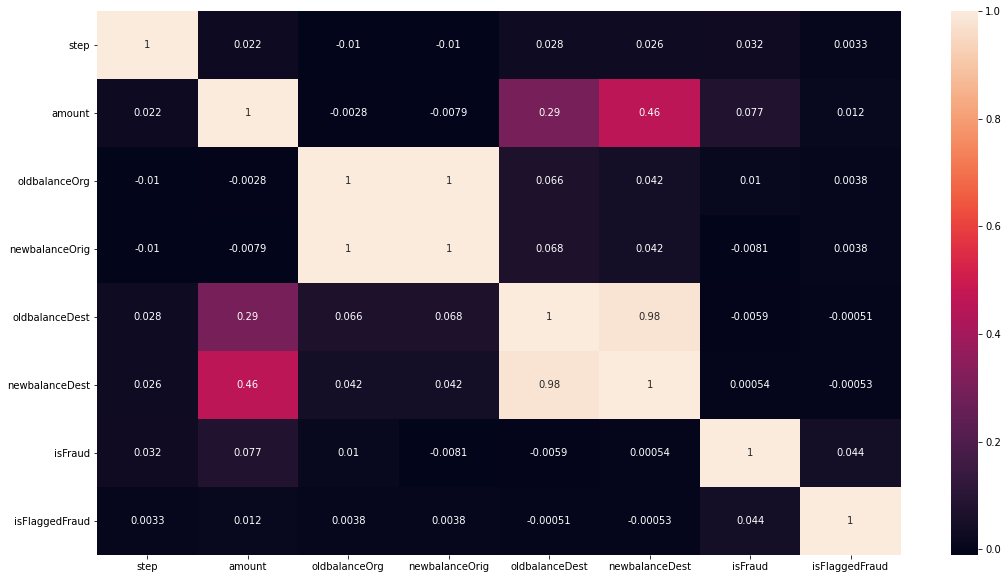

In [42]:
import matplotlib.pyplot as plt 
import seaborn as sns
plt.figure(figsize = (18,10))
sns.heatmap(df.corr(), annot=True)

In [52]:
from statistics import mean, stdev
from sklearn import preprocessing
from sklearn.model_selection import StratifiedKFold
from sklearn import linear_model
from sklearn import datasets
# Feature Scaling for input features.
scaler = preprocessing.MinMaxScaler()
x_scaled = scaler.fit_transform(X)
  
# Create  classifier object.
lr = linear_model.LogisticRegression()
  
# Create StratifiedKFold object.
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
lst_accu_stratified = []
  
for train_index, test_index in skf.split(X, y):
    x_train_fold, x_test_fold = x_scaled[train_index], x_scaled[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]
    lr.fit(x_train_fold, y_train_fold)
    lst_accu_stratified.append(lr.score(x_test_fold, y_test_fold))

    
# Print the output.
print('List of possible accuracy:', lst_accu_stratified)
print('\nMaximum Accuracy That can be obtained from this model is:',
      max(lst_accu_stratified)*100, '%')
print('\nMinimum Accuracy:',
      min(lst_accu_stratified)*100, '%')
print('\nOverall Accuracy:',
      mean(lst_accu_stratified)*100, '%')
print('\nStandard Deviation is:', stdev(lst_accu_stratified))

C:\Users\Karim\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  test_folds = np.zeros(n_samples, dtype=np.int)
C:\Users\Karim\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:442: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review

C:\Users\Karim\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:102: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  test_mask = np.zeros(_num_samples(X), dtype=np.bool)
C:\Users\Karim\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:102: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  test_mask = np.zeros(_num_samples(X), dty

C:\Users\Karim\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Karim\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:291: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  indices = (scores > 0).astype(np.int)
C:\Users\Karim\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warni

List of possible accuracy: [0.9988212421592958, 0.9988102404194492, 0.9988070970652073, 0.9988133819087106, 0.9988180969474839, 0.9988243836658484, 0.9988102385495283, 0.998818095089908, 0.9988039499513565, 0.998811808361663]

Maximum Accuracy That can be obtained from this model is: 99.88243836658484 %

Minimum Accuracy: 99.88039499513565 %

Overall Accuracy: 99.88138534118451 %

Standard Deviation is: 6.461264963750108e-06


C:\Users\Karim\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:291: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  indices = (scores > 0).astype(np.int)
